# Проверка гипотез. Задача 1


In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Считаем данные.

Имеем выборку из экспоненциального распределения с параметром $\theta$, $\theta \in \{0.9;1;1.1\}$.

In [2]:
thetas = [0.9, 1., 1.1]
sample = np.load('9_1.npy')

In [3]:
sample.mean()

0.9730796138659072

In [4]:
len(sample)

100

#### 2. С помощью процедуры проверки гипотез определим истинное значение $\theta$.

Сначала проверим гипотезу $H_0: \theta = \theta_0 = 0.9$ против альтернативы $H_1: \theta > 0.9$ с помощью теоремы о монотонном отношении правдоподобия. Функция правдоподобия для экспоненциального распределения с параметром $\theta$ имеет вид 

$$
f_\theta(X) = \theta^n e^{-\theta\sum_{i=1}^nX_i} I(X_i \ge 0\,\,\, \forall i).
$$
Тогда 
$$
L_{\theta', \theta''} = \left(\frac{\theta'}{\theta''}\right)^n e^{(\theta'' - \theta')\sum_{i=1}^nX_i}I(X_i \ge 0\,\,\, \forall i)
$$ 
является невозрастающей функцией по $T(X) = \sum_{i=1}^nX_i$ при $\theta'' < \theta'$, и значит, если для некоторого $c_1$ выполнено $P_{\theta_0}(T(X) \le c_1) = \alpha$, то $S = \{T(X) \le c_1\}$ - РНМК уровня значимости $\alpha$ для проверки $H_0$ против $H_1$. Как известно, $T(X) \sim Г(n, \theta_0)$ при условии верности $H_0$. Тогда $c_1 = u_\alpha$ - $\alpha$-квантиль $Г(n, \theta_0)$. 

In [5]:
T = sample.sum()
T

97.30796138659072

Предложенные значения параметра $\theta$ отличаются не сильно, поэтому можно предположить, что при слишком маленьком уровне значимости мы не сможем отвергнуть никакую гипотезу, т.к. если вероятностная мера критического множества будет мала для одного значения параметра, то и для другого (близкого) она, скорее всего, будет мала и наша выборка может туда не попасть. Для иллюстрации построим гистограмму распределения статистики $T(X)$ для разных значений параметра, сгенерировав по 1000 выборок из каждого распределения.

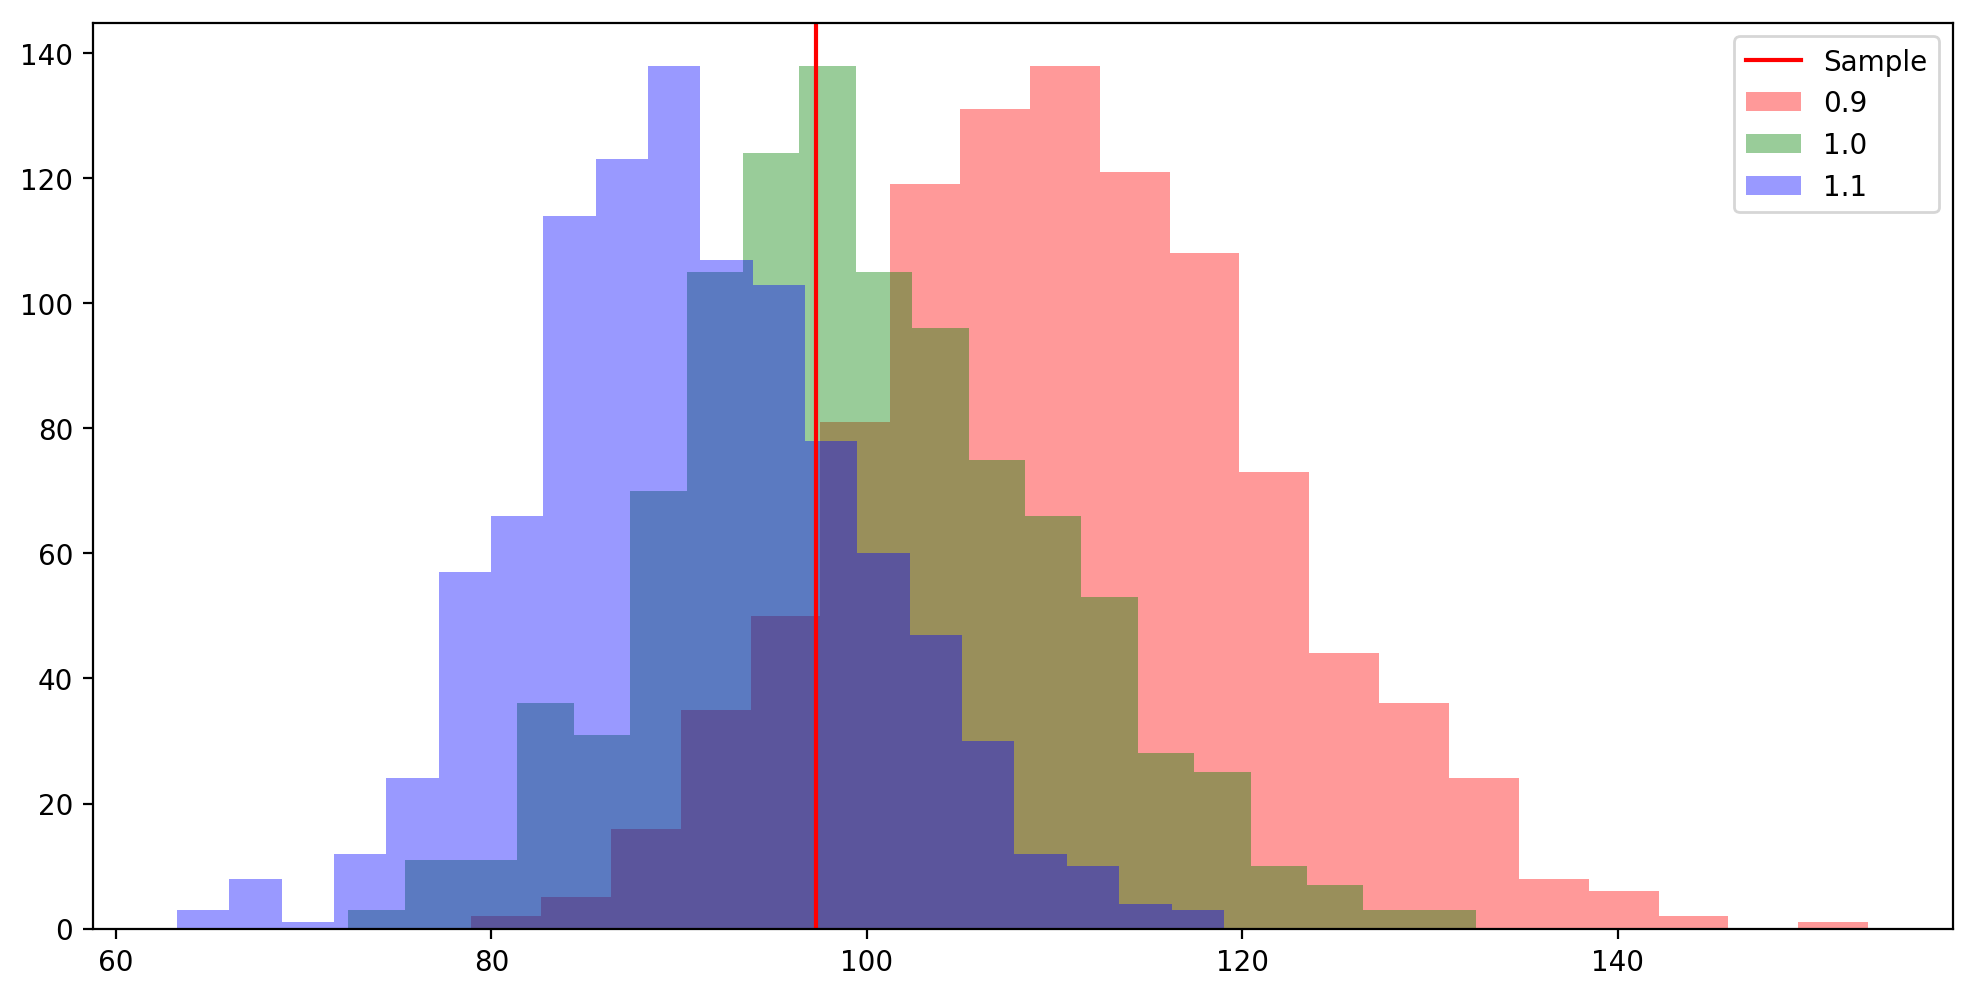

In [17]:
plt.figure(figsize=(12, 6), dpi=200)
colors=['r','g', 'b']
for i, t in enumerate(thetas):
    plt.hist([np.sum(sts.expon(scale=1/t).rvs(100)) for j in range(1000)],
             color=colors[i], alpha=0.4, label=str(t), bins=20)
plt.axvline(T, c='red', label='Sample')
plt.legend()
plt.show()

Видим, что области значений статистики действительно сильно перекрываются, к тому же наша выборка находится на пересечении всех трех областей. 

Возьмем $\alpha = 0.05$ (максимальная допустимая вероятность отвергнуть верную гипотезу).

In [8]:
n = len(sample)
distr_0 = sts.gamma(a=n, scale=1/thetas[0])
c1 = distr_0.ppf(0.05)
c1

93.48808579812689

In [9]:
T <= c1

False

Гипотеза не отвергается. Найдем минимальный уровень значимости, при котором она отвергнется. Это произойдет при $T(X) = c1 = u_\alpha$, откуда $\alpha_{min} = F_{\theta_0}(T(X))$.

In [10]:
amin = distr_0.cdf(T)
print(amin)

0.10309541594657372


In [11]:
c1 = distr_0.ppf(amin)
T <= c1

True

Видим, что гипотеза $H_0$ отвергается на уровне значимости немногим больше 10%. С учетом вышесказанного, этот уровень не слишком большой, поэтому исключим $\theta_0$ из рассмотрения. Теперь тем же способом проверим $H_1: \theta = \theta_1 = 1$ против $H_2: \theta = \theta_2 = 1.1$. Сразу будем искать минимальный уровень значимости, при котором отвергнется $H_1$.

In [12]:
distr_1 = sts.gamma(a=n, scale=1/thetas[1])
amin = distr_1.cdf(T)
print(amin)

0.4058468710100512


Это уже довольно много, при такой большой вероятности ошибки 1 рода не стоит отвергать гипотезу. Попробуем проверить $H_2$ против $H_1$. Т.к. $\theta_2 > \theta_1$, в этом случае РНМК уровня значимости $\alpha$ будет иметь вид $S = \{T(X) \ge c_2\}$, где $c_2 = u_{1-\alpha}$ - $1 - \alpha$-квантиль $Г(n, \theta_2)$

In [13]:
distr_2 = sts.gamma(a=n, scale=1/thetas[2])
amin = 1 - distr_2.cdf(T)
print(amin)

0.23540622082077511


Итак, на уровне значимости примерно 23.5% мы отвергаем $H_2$.

#### 3. Вывод

Методом исключения мы получили, что истинное значение параметра равно 1. При этом вероятность ошибки 1 рода можно оценить сверху как 33.6% (отвергнули две гипотезы), что немало, однако из гистограммы видно, что такая оценка вполне соответствует действительности (в область с примерно таким же значением $T(X)$ попадали выборки и из распределений с другими значениями параметров).